一：导入模块

In [2]:
import wordcloud#词云展示库
import numpy as np# numpy数据处理库
import pandas as pd
import jieba# 结巴分词
import jieba.analyse
from collections import Counter# 词频统计库
from PIL import Image # 图像处理库
import matplotlib.pyplot as plt # 图像展示库
from imageio import imread#图片读入
import pyttsx3#音频
from gensim import corpora,models,similarities
import gensim
from sklearn.model_selection import train_test_split#数据集划分
from sklearn.naive_bayes import MultinomialNB#贝叶斯分类器
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

二：数据的读入以及显示

In [4]:
df_news=pd.read_table("./cnews/cnews.val.txt",names=["category","content"],encoding="utf_8")
df_news=df_news.dropna()#有缺失的数据则删除
df_news.head()#显示新闻文件的前一个
#df_news.tail(1)#显示新闻文件的后一个


,category,content
0,体育,黄蜂vs湖人首发：科比带伤战保罗 加索尔救赎之战 新浪体育讯北京时间4月27日，NBA季后赛...
1,体育,1.7秒神之一击救马刺王朝于危难 这个新秀有点牛！新浪体育讯在刚刚结束的比赛中，回到主场的马...
2,体育,1人灭掘金！神般杜兰特！ 他想要分的时候没人能挡新浪体育讯在NBA的世界里，真的猛男，敢于直...
3,体育,韩国国奥20人名单：朴周永领衔 两世界杯国脚入选新浪体育讯据韩联社首尔9月17日电 韩国国奥...
4,体育,天才中锋崇拜王治郅 周琦：球员最终是靠实力说话2月14日从土耳其男篮邀请赛回到北京之后，周琦...


In [5]:
df_news.content.shape#数据的总量

(5000,)

In [6]:
#df_news["category"].value_counts()
df_news.category.unique()#数据的类别

array(['体育', '娱乐', '家居', '房产', '教育', '时尚', '时政', '游戏', '科技', '财经'],
      dtype=object)

#把新闻文件的内容转化成list格式

In [7]:
content_list=df_news.content.values.tolist()
content_list[0] #样本显示


'黄蜂vs湖人首发：科比带伤战保罗 加索尔救赎之战 新浪体育讯北京时间4月27日，NBA季后赛首轮洛杉矶湖人主场迎战新奥尔良黄蜂，此前的比赛中，双方战成2-2平，因此本场比赛对于两支球队来说都非常重要，赛前双方也公布了首发阵容：湖人队：费舍尔、科比、阿泰斯特、加索尔、拜纳姆黄蜂队：保罗、贝里内利、阿里扎、兰德里、奥卡福[新浪NBA官方微博][新浪NBA湖人新闻动态微博][新浪NBA专题][黄蜂vs湖人图文直播室](新浪体育)'

三：给新闻文本分词  
将【文本集】生成【分词列表】
使用jieba.cut函数

In [8]:
content_fenci = []#建立一个空的
for line in content_list:
    text = jieba.lcut(line)#给每一条都分词
    if len(text) > 1 and text != '\r': #换行
        content_fenci.append(text)#分词后的结果放入
content_fenci[0]  #分词后的一个样本     

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/rj/kh58t7hj5s99k8krgn4brl1c0000gn/T/jieba.cache
Loading model cost 0.569 seconds.
Prefix dict has been built successfully.


['黄蜂',
 'vs',
 '湖人',
 '首发',
 '：',
 '科比',
 '带伤',
 '战',
 '保罗',
 ' ',
 '加索尔',
 '救赎',
 '之战',
 ' ',
 '新浪',
 '体育讯',
 '北京',
 '时间',
 '4',
 '月',
 '27',
 '日',
 '，',
 'NBA',
 '季后赛',
 '首轮',
 '洛杉矶',
 '湖人',
 '主场',
 '迎战',
 '新奥尔良',
 '黄蜂',
 '，',
 '此前',
 '的',
 '比赛',
 '中',
 '，',
 '双方',
 '战成',
 '2',
 '-',
 '2',
 '平',
 '，',
 '因此',
 '本场',
 '比赛',
 '对于',
 '两支',
 '球队',
 '来说',
 '都',
 '非常',
 '重要',
 '，',
 '赛前',
 '双方',
 '也',
 '公布',
 '了',
 '首发',
 '阵容',
 '：',
 '湖人队',
 '：',
 '费舍尔',
 '、',
 '科比',
 '、',
 '阿泰斯特',
 '、',
 '加索尔',
 '、',
 '拜纳姆',
 '黄蜂队',
 '：',
 '保罗',
 '、',
 '贝里',
 '内利',
 '、',
 '阿里',
 '扎',
 '、',
 '兰德',
 '里',
 '、',
 '奥卡福',
 '[',
 '新浪',
 'NBA',
 '官方',
 '微博',
 ']',
 '[',
 '新浪',
 'NBA',
 '湖人',
 '新闻动态',
 '微博',
 ']',
 '[',
 '新浪',
 'NBA',
 '专题',
 ']',
 '[',
 '黄蜂',
 'vs',
 '湖人',
 '图文',
 '直播室',
 ']',
 '(',
 '新浪',
 '体育',
 ')']

In [9]:
df_content=pd.DataFrame({'content':content_fenci})#分词后的数据格式转换成Datafram形式
df_content.head()

,content
0,"[黄蜂, vs, 湖人, 首发, ：, 科比, 带伤, 战, 保罗, , 加索尔, 救赎,..."
1,"[1.7, 秒, 神, 之一, 击救, 马刺, 王朝, 于, 危难, , 这个, 新秀, ..."
2,"[1, 人灭, 掘金, ！, 神般, 杜兰特, ！, , 他, 想要, 分, 的, 时候,..."
3,"[韩国, 国奥, 20, 人, 名单, ：, 朴周, 永, 领衔, , 两, 世界杯, 国..."
4,"[天才, 中锋, 崇拜, 王治郅, , 周琦, ：, 球员, 最终, 是, 靠, 实力, ..."


四：去停用词--》将文本中含有的停止词剔除，达到清洗文本的目的。


In [11]:
df_stopwords=pd.read_csv("stopWord.txt",index_col=False,sep="\t",quoting=3,names=['stopword'], encoding='utf-8')#读取停用词
#当文本文件中带有英文双引号时，直接用pd.read_csv进行读取会导致行数减少，此时应该对read_csv设置参数quoting=3
#df_stopwords.head(10)
stopwords_list=df_stopwords.stopword.values.tolist()#把停用词表转化成list格式
stopwords_list[0:10]

[',', '?', '、', '。', '“', '”', '《', '》', '！', '，']

#采取遍历的方法，已经分词后新闻文本中出现了停用词中的单词则去掉。#

In [12]:
def drop_stopwords(contents,stopwords):
    content_clean = []# 放清理后的分词
    all_words = []
    for line in contents:
        line_clean=[]
        for word in line:
            if word in stopwords:
                continue
            line_clean.append(word)
            all_words.append(str(word))
        content_clean.append(line_clean)
    return content_clean,all_words

content_clean,all_words = drop_stopwords(content_fenci,stopwords_list)
content_clean[1]
all_words[0:10]

['黄蜂', 'vs', '湖人', '首发', '科比', '带伤', '战', '保罗', ' ', '加索尔']

#想删除决去停用词后，生成空位所占的位置。比如：以下例子
（但是没能解决）

In [13]:
s=['黄蜂', 'vs', '湖人', '首发', '科比', '带伤', '战', '保罗', ' ', '加索尔']

In [14]:
for i in s:
    if ' ' in s:
        s.remove(' ')
s

['黄蜂', 'vs', '湖人', '首发', '科比', '带伤', '战', '保罗', '加索尔']

In [15]:
all_word=pd.DataFrame(all_words)
all_word.shape

(1534796, 1)

In [16]:
df_clean= pd.DataFrame({'contents_clean':content_clean})
df_clean.head()

,contents_clean
0,"[黄蜂, vs, 湖人, 首发, 科比, 带伤, 战, 保罗, , 加索尔, 救赎, 之战..."
1,"[1.7, 秒, 神, 击救, 马刺, 王朝, 危难, , 新秀, 有点, 牛, 新浪, ..."
2,"[人灭, 掘金, 神般, 杜兰特, , 想要, 分, 没人能, 挡, 新浪, 体育讯, N..."
3,"[韩国, 国奥, 20, 人, 名单, 朴周, 永, 领衔, , 两, 世界杯, 国脚, ..."
4,"[天才, 中锋, 崇拜, 王治郅, , 周琦, 球员, 最终, 实力, 说话, 月, 14..."


五：统计词频两种方式
   

In [17]:
#第一种
tf= Counter(all_words)
tf.most_common(500)#显示统计完之后的前500个词


[(' ', 84037),
 ('\xa0', 20021),
 ('基金', 9828),
 ('中', 7715),
 ('年', 6820),
 ('月', 6528),
 ('一个', 4856),
 ('市场', 4436),
 ('日', 4286),
 ('中国', 3948),
 ('人', 3680),
 ('说', 3410),
 ('公司', 3304),
 ('the', 3124),
 ('后', 3015),
 ('时', 2865),
 ('新', 2579),
 ('已经', 2571),
 ('企业', 2530),
 ('进行', 2522),
 ('时间', 2502),
 ('分', 2442),
 ('考试', 2419),
 ('产品', 2416),
 ('表示', 2303),
 ('下', 2299),
 ('最', 2291),
 ('元', 2291),
 ('投资', 2288),
 ('发展', 2286),
 ('问题', 2280),
 ('好', 2238),
 ('做', 2225),
 ('目前', 2143),
 ('记者', 2116),
 ('北京', 2099),
 ('10', 2059),
 ('活动', 2058),
 ('行业', 2050),
 ('to', 2000),
 ('只', 1891),
 ('现在', 1877),
 ('成为', 1841),
 ('一些', 1839),
 ('玩家', 1822),
 ('新浪', 1818),
 ('出现', 1757),
 ('设计', 1744),
 ('经济', 1698),
 ('今年', 1662),
 ('of', 1651),
 ('房地产', 1649),
 ('游戏', 1647),
 ('比赛', 1641),
 ('认为', 1618),
 ('情况', 1602),
 ('需要', 1568),
 ('方面', 1563),
 ('考生', 1539),
 ('2009', 1527),
 ('四六级', 1515),
 ('品牌', 1483),
 ('2008', 1470),
 ('万', 1458),
 ('选择', 1397),
 ('消费者', 1380),
 ('获得', 1373),
 

In [20]:
#第二种
df_all_words=pd.DataFrame({"all_words":all_words})
frequen=df_all_words.groupby(by=["all_words"])["all_words"].agg([("count",np.size])
frequen = frequen.reset_index().sort_values(by=["count"],ascending=False)
frequen.head(10)

,all_words,count
1,,84037
19362,,20021
43294,基金,9828
23185,中,7715
51347,年,6820
64141,月,6528
19521,一个,4856
50638,市场,4436
62372,日,4286
23321,中国,3948


六：绘制词云

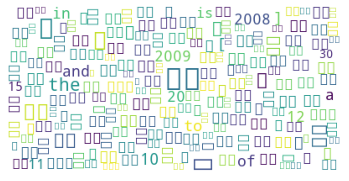

In [22]:
#生成词云
# font = r'Dengl.ttf'#导入字体
wcd= wordcloud.WordCloud(background_color='white',max_words=200, max_font_size=80,random_state=30 )
#最大字体的大小
#设置最大现实的字数 
# 设置有多少种随机生成状态，即有多少种配色方案 
wcd.generate_from_frequencies(tf)
plt.imshow(wcd) # 显示词云
plt.axis('off') # 关闭坐标轴
plt.show()

In [24]:
#导入背景图片后的词云
mask = imread('4.png')#读入图片
wc= wordcloud.WordCloud(mask=mask,background_color='white',scale=2)
#scale : 按照比例进行放大画布，如设置为2，则长和宽都是原来画布的2倍。
wc.generate_from_frequencies(tf)
plt.imshow(wc) # 显示词云
plt.axis('off') # 关闭坐标轴
plt.show()
wc.to_file('ciyun.jpg')#保存词云

FileNotFoundError: No such file: '/Users/lhc456/Desktop/python/some_small_recommendation_alog/新闻自动文摘/4.png'

七：基于TF-IDF的关键词提取

In [25]:
import jieba.analyse
index = 2 #文档中的第二篇新闻文本
# 词之间相连
content_S_str = "".join(content_clean[index])
print(content_list[index])
print('关键词：')
print(" ".join(jieba.analyse.extract_tags(content_S_str, topK=10, withWeight=False)))


1人灭掘金！神般杜兰特！ 他想要分的时候没人能挡新浪体育讯在NBA的世界里，真的猛男，敢于直面惨淡的手感，敢于正视落后的局面，然后用一己之力，力挽狂澜，点燃球迷激情，最后微微一笑，带领球队在季后赛的战场上赢下比赛，并进入下一轮，今日雷霆凯文-杜兰特所做的，无非就是这样的事情。巨星这个东西很难定义，有时候你就是30分30板也未必能得到一个巨星名头，反而会有可能会被称为刷子，而巨星不仅是数据上能够出类拔萃，也不仅仅是能够帮助球队赢球，从意志力层面上来讲，母队比赛快输了，队友的腿都开始抖了，所有人都在看着你，球都到了你手中，此时你上去扶大厦于将倾，这，才是真巨星范儿。而今天的比赛中，杜兰特的手感其实并不好，他在全场比赛还剩下5分31秒之前，只有19投8中，雷霆也以80-87落后掘金7分之多，而在剩下的比赛中，他一人8投6中，其中包括一个三分球，再加上3次罚球，狂砍16分，最终雷霆也在主场以100-97战胜对手，昂首晋级次轮，而且，在终场前9秒，是杜兰特亲手封盖了J.R.-史密斯的三分出手，也亲手送掘金回家钓鱼。而且，在雷霆最后5分31秒内这波20-10的进攻高潮中，除了拉塞尔-威斯布鲁克造犯规2罚1中得1分以外，还有16分为杜兰特自己所得，剩下的那个詹姆斯-哈登的三分球，也来自于杜兰特的助攻！也就是说，除了1分，杜兰特几乎包办了雷霆最后时刻的所有进攻，也等于是杜兰特一个人，就决定了这场比赛，也决定了整个系列赛！少年是最锋利的刀，没有谁比年仅23岁的连续两届得分王杜兰特更想在季后赛里证明自己了！在常规赛MVP的评选中，所有人都在谈论德里克-罗斯的进步，间或有人认为勒布朗-詹姆斯也相当不错，但是几乎没有人会想到杜兰特，没有人会想到这个将去年才勉强西部第八晋级季后赛的球队带到今年首轮便获得主场优势的少年，所有人都被他的得分王的表象所迷惑，很难看清楚他究竟对目前这支雷霆队有着怎样的MVP级别的影响力。甚至有人说过，雷霆今年的进步之大，与威斯布鲁克的成长之快有很大的联系，谁是雷霆真领袖尚未可知。那么我们来看看本场比赛之中威斯布鲁克干了些什么吧，在杜兰特接管比赛之前，威斯布鲁克的手感状态也不很好，但是球队也给了他决定比赛走向的机会。第四节威少登场的时候，雷霆以76-83同样落后7分，威少一击三分球，全场球迷也登时沸腾了起来。但是在后面的几次进攻中，威少也想展示巨星风采，但是他失败了，

八：语音播报

In [26]:
import pyttsx3
voice=pyttsx3.init()
voice.say(" ".join(jieba.analyse.extract_tags(content_S_str, topK=6, withWeight=False)))
print("准备语音播报.....")
voice.runAndWait()

准备语音播报.....


九：LDA主题模型

In [26]:
def create_LDA(content_clean):
#基于文本集建立【词典】，并获得词典特征数
    dictionary = corpora.Dictionary(content_clean)
    #基于词典，将【分词列表集】转换成【稀疏向量集】，称作【语料库】
    dic = len(dictionary.token2id)
    print('词典特征数：%d' % dic)
    corpus = [dictionary.doc2bow(sentence) for sentence in content_clean]
    lda = gensim.models.LdaModel(corpus=corpus, id2word = dictionary,num_topics = 10,passes=10)
    #passes 训练几轮
    print('-----------')
    for topic in lda.print_topics(num_topics=10, num_words = 5):
        print(topic[1])
create_LDA(content_clean)


词典特征数：101035
-----------
0.018*" " + 0.007*"家具" + 0.007*"项目" + 0.006*"平米" + 0.006*"月"
0.143*" " + 0.012*"分" + 0.010*"比赛" + 0.007*"中" + 0.006*" "
0.332*" " + 0.014*"the" + 0.012*" " + 0.010*"考试" + 0.009*"to"
0.008*"月" + 0.006*"中" + 0.006*"日" + 0.006*"活动" + 0.005*" "
0.035*" " + 0.018*" " + 0.009*"元" + 0.009*"功能" + 0.009*"像素"
0.007*"中" + 0.007*"人" + 0.006*"一个" + 0.005*"月" + 0.005*"说"
0.021*"橱柜" + 0.019*"装修" + 0.016*"品牌" + 0.013*"消费者" + 0.010*"家居"
0.006*"面值" + 0.006*"张远忠" + 0.005*"陈水扁" + 0.004*"律师" + 0.004*"绿城"
0.061*"基金" + 0.012*"公司" + 0.012*"年" + 0.011*"投资" + 0.010*"市场"
0.013*"一个" + 0.011*"中国" + 0.009*"市场" + 0.008*"说" + 0.008*"企业"


十：贝叶斯分类模型两种

In [27]:
#创建字典,X为内容， y为种类
df_train = pd.DataFrame({"content":content_fenci ,"label":df_news['category']})
#为了方便计算,把对应的label字符类型转换为数字
#映射类型(mapping)
#非空字典
label_mapping = {"体育": 0, "娱乐": 1, "家居": 2, "房产": 3, "教育":4, "时尚": 5,"时政": 6,"游戏": 7,"科技": 8,"财经": 9}
df_train['label'] = df_train['label'].map(label_mapping)
#df_train.head()
#之后将每个新闻信息转换成字符串形式。因为CountVectorizer 和 TfidfVectorizer的输入为字符串形式。
def create_words(data):
    words = []
    for index in range(len(data)):
        try:
            words.append( ' '.join(data[index]))
        except Exception:
            print(index)
    return words

#把数据分成测试集和训练集
x_train,x_test,y_train,y_test = train_test_split(df_train['content'].values,df_train['label'].values,random_state=0)    
#没有设置 random.seed()，每次取得的结果就不一样，

train_words = create_words(x_train)
test_words = create_words(x_test)

In [28]:
#第一种
#CountVectorizer是属于常见的特征数值计算类，是一个文本特征提取方法。
#对于每一个训练文本，它只考虑每种词汇在该训练文本中出现的频率。
vec = CountVectorizer(analyzer = 'word',max_features=4000,lowercase=False)
#max_feature表示的是最大的特征数
vec.fit(train_words)
#拟合模型，并返回文本矩阵
classifier = MultinomialNB()#多项式朴素贝叶斯
classifier.fit(vec.transform(train_words),y_train)
print("训练集准确率:",classifier.score(vec.transform(test_words), y_test))


训练集准确率: 0.9704


In [29]:
#第二种
#而TfidfVectorizer除了考量某一词汇在当前训练文本中出现的频率之外，
#同时关注包含这个词汇的其它训练文本数目的倒
vectorizer = TfidfVectorizer(analyzer='word',max_features = 40000,lowercase=False)
vectorizer.fit(train_words)
classifier = MultinomialNB()
classifier.fit(vectorizer.transform(train_words),y_train)#学习
print("模型准确率为:",classifier.score(vectorizer.transform(test_words), y_test))


模型准确率为: 0.976
